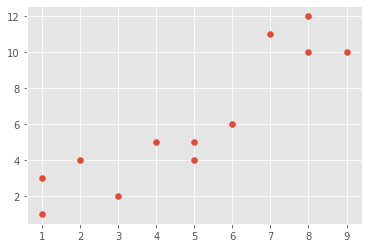

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('ggplot')
X = np.array([[1, 1],
              [1, 3],
              [2, 4],
              [3, 2],
              [4, 5],
              [5, 4],
              [5, 5],
              [6, 6],
              [7, 11],
              [8, 10],
              [8, 12],
              [9,10]])

plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

150.0
286.1111111111111
66.66666666666666
14.116915422885569
114.28571428571428
24.542124542124547
16.666666666666664
45.83333333333333
14.935400516795864
29.999999999999996
36.111111111111114
14.95703544575725


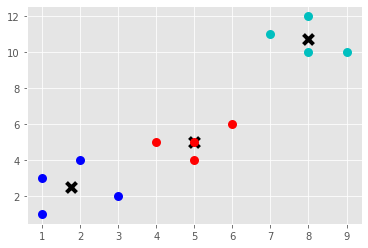

In [12]:
model = K_Means()
model.fit(X)

colors = 3*["b","r","c"]

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="x", color="k", s=100, linewidths=4)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker=".", color=color, s=100, linewidths=4)
        
plt.show()
